# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb
Importing Jupyter notebook from multiscorer.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [7]:
import pandas_to_latex

In [8]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

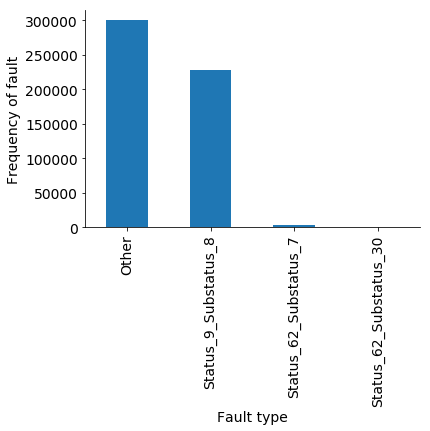

<Figure size 1440x1152 with 0 Axes>

In [9]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [10]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [11]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

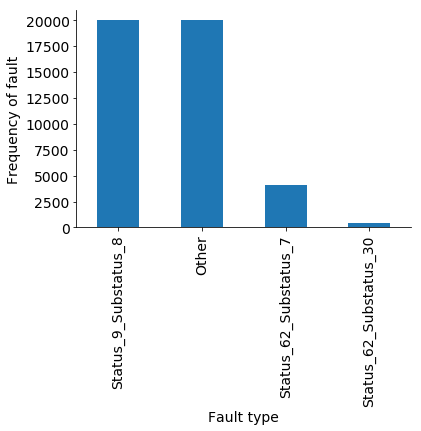

<Figure size 1440x1152 with 0 Axes>

In [12]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [13]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,24-11-2017 03:29:00,5.200000,9.8,19.68,140.0,993.0,26.0,46.0,35.0,25.0,...,50.0,31.0,46.0,5.0,21.0,23.0,43.0,6.35,145.199997,Other
1,19-11-2017 16:40:30,-2.100000,6.3,13.16,67.0,317.0,11.0,22.0,24.0,10.0,...,57.0,25.0,24.0,0.0,6.0,11.0,21.0,1.00,64.900002,Other
2,27-05-2019 22:40:00,-20.700001,6.1,9.48,208.0,97.0,18.0,28.0,27.0,24.0,...,58.0,34.0,42.0,7.0,13.0,19.0,37.0,1.00,187.300003,Other
3,25-07-2018 18:18:30,11.900001,2.8,7.53,252.0,24.0,20.0,32.0,29.0,24.0,...,48.0,34.0,31.0,14.0,22.0,27.0,44.0,1.00,263.899994,Other
4,09-06-2019 02:23:30,-3.000000,7.4,14.94,152.0,456.0,27.0,39.0,36.0,33.0,...,50.0,42.0,46.0,18.0,28.0,32.0,44.0,1.00,149.000000,Other


In [14]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [15]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [16]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [17]:
columns_for_data = X_train.columns

In [18]:
y_train.value_counts()

Other                     13400
Status_9_Substatus_8      13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [19]:
y_test.value_counts()

Other                     6600
Status_9_Substatus_8      6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## SMOTE (BEFORE RANDOM FOREST)

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smote1 ,y_train_smote1 = sm.fit_resample(X_train, y_train)


X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)

## Random forest and feature importance

Normalized confusion matrix
[[9.84090909e-01 1.81818182e-03 4.84848485e-03 9.24242424e-03]
 [1.15757576e-01 8.75606061e-01 0.00000000e+00 8.63636364e-03]
 [3.63636364e-03 0.00000000e+00 9.96363636e-01 0.00000000e+00]
 [1.60606061e-02 3.03030303e-04 4.54545455e-04 9.83181818e-01]]


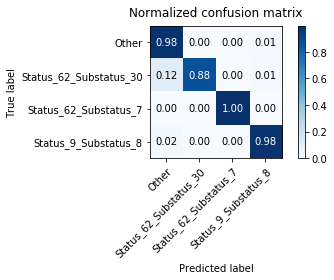

Total Accuracy 		0.960

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.879 		 0.984 		 0.929
Status_62_Substatus_30    	 0.998 		 0.876 		 0.933
Status_62_Substatus_7     	 0.995 		 0.996 		 0.996
Status_9_Substatus_8      	 0.982 		 0.983 		 0.983
Normalized confusion matrix
[[9.84393939e-01 4.54545455e-04 4.39393939e-03 1.07575758e-02]
 [2.04724409e-01 7.87401575e-01 0.00000000e+00 7.87401575e-03]
 [5.17751479e-03 0.00000000e+00 9.94822485e-01 0.00000000e+00]
 [1.57575758e-02 0.00000000e+00 0.00000000e+00 9.84242424e-01]]


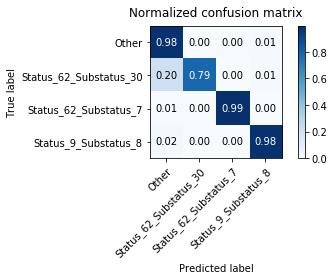

Total Accuracy 		0.984

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.979 		 0.984 		 0.982
Status_62_Substatus_30    	 0.971 		 0.787 		 0.870
Status_62_Substatus_7     	 0.979 		 0.995 		 0.987
Status_9_Substatus_8      	 0.989 		 0.984 		 0.987


In [21]:
rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [23]:
pandas_to_latex.df_to_latex(rf1.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.164641 \\
   0.080166 \\
   0.075193 \\
   0.071267 \\
   0.039643 \\
\bottomrule
\end{tabular}



## Scale dataset for SVM

In [24]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.515065,0.573770,0.893946,0.328691,0.979193,0.605263,0.709302,0.298701,0.481928,0.506024,...,0.645161,0.662791,0.300000,0.255319,0.235294,0.650602,0.509804,0.708738,0.222486,0.514607
1,0.496126,0.172131,0.511808,0.317549,0.000000,0.526316,0.569767,0.298701,0.481928,0.493976,...,0.795699,0.848837,0.500000,0.521277,0.215686,0.361446,0.549020,0.203883,0.148216,0.492952
2,0.481779,0.210383,0.608845,0.130919,0.149813,0.434211,0.569767,0.214286,0.457831,0.457831,...,0.548387,0.686047,0.400000,0.340426,0.254902,0.397590,0.137255,0.252427,0.000000,0.345863
3,0.455380,0.360656,0.834693,0.445682,0.624636,0.736842,0.755814,0.428571,0.530120,0.566265,...,0.602151,0.523256,0.400000,0.361702,0.470588,0.662651,0.549020,0.650485,0.001401,0.557916
4,0.249928,0.144809,0.000000,0.325905,0.000000,0.342105,0.290698,0.168831,0.457831,0.445783,...,0.107527,0.151163,0.366667,0.170213,0.294118,0.385542,0.274510,0.233010,0.979950,0.323800


In [26]:
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

pandas_to_latex.df_to_latex(head_row_col(X_train_scaled_df))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.573770 &    0.893946 &          0.328691 &     0.979193 &             0.605263 &  ... \\
  0.172131 &    0.511808 &          0.317549 &     0.000000 &             0.526316 &  ... \\
  0.210383 &    0.608845 &          0.130919 &     0.149813 &             0.434211 &  ... \\
  0.360656 &    0.834693 &          0.445682 &     0.624636 &             0.736842 &  ... \\
  0.144809 &    0.000000 &          0.325905 &     0.000000 &             0.342105 &  ... \\
\bottomrule
\end{tabular}



## SMOTE (For SVM)

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

### BALANCED SVM

In [ ]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

Loading...
Training...


### UNBALANCED SVM

In [ ]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

In [ ]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [ ]:
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

# Print to latex
df_to_latex(df_selected_features)

In [ ]:
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

In [ ]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled_smote))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled_smote))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

In [ ]:
col_rename_dict = {i:j for i,j in zip(X_test_scaled_removed.columns,shorter_feature_names)}
X_test_scaled_removed.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_test_scaled_removed.head()

In [ ]:
# Train DT on these features and print it out:
dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_test_scaled_removed.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [ ]:
save_tree(dt_depth2,"depth2")
save_tree(dt_depth3,"depth3")